# Cloudy models of NGC 346 bow shock around Walborn 3

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import cmasher as cmr
import astropy.units as u
from pathlib import Path
import sys
from cloudytab import cloudytab

In [2]:
cloudytab?

Type:        module
String form: <module 'cloudytab.cloudytab' from '/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/cloudytab/cloudytab.py'>
File:        ~/miniconda3/envs/py39/lib/python3.9/site-packages/cloudytab/cloudytab.py
Docstring:   <no docstring>

In [3]:
sns.set_context("talk")
sns.set_color_codes()

In [4]:
ROOT = Path.cwd().parent.parent
m1 = cloudytab.CloudyModel(ROOT / "cloudy/models/w3-n010")
m2 = cloudytab.CloudyModel(ROOT / "cloudy/models/w3-n010-p")
m3 = cloudytab.CloudyModel(ROOT / "cloudy/models/w3-n030-p")

In [5]:
m1.data.keys()

dict_keys(['Si', 'C', 'gdrift', 'ovr', 'Ne', 'Ar', 'gpot', 'gcont', 'phys', 'Cl', 'lina', 'gcharge', 'S', 'gabun', 'emis', 'O', 'N', 'cont', 'pre', 'gtemp', 'rad', 'lya'])

## Optical lines

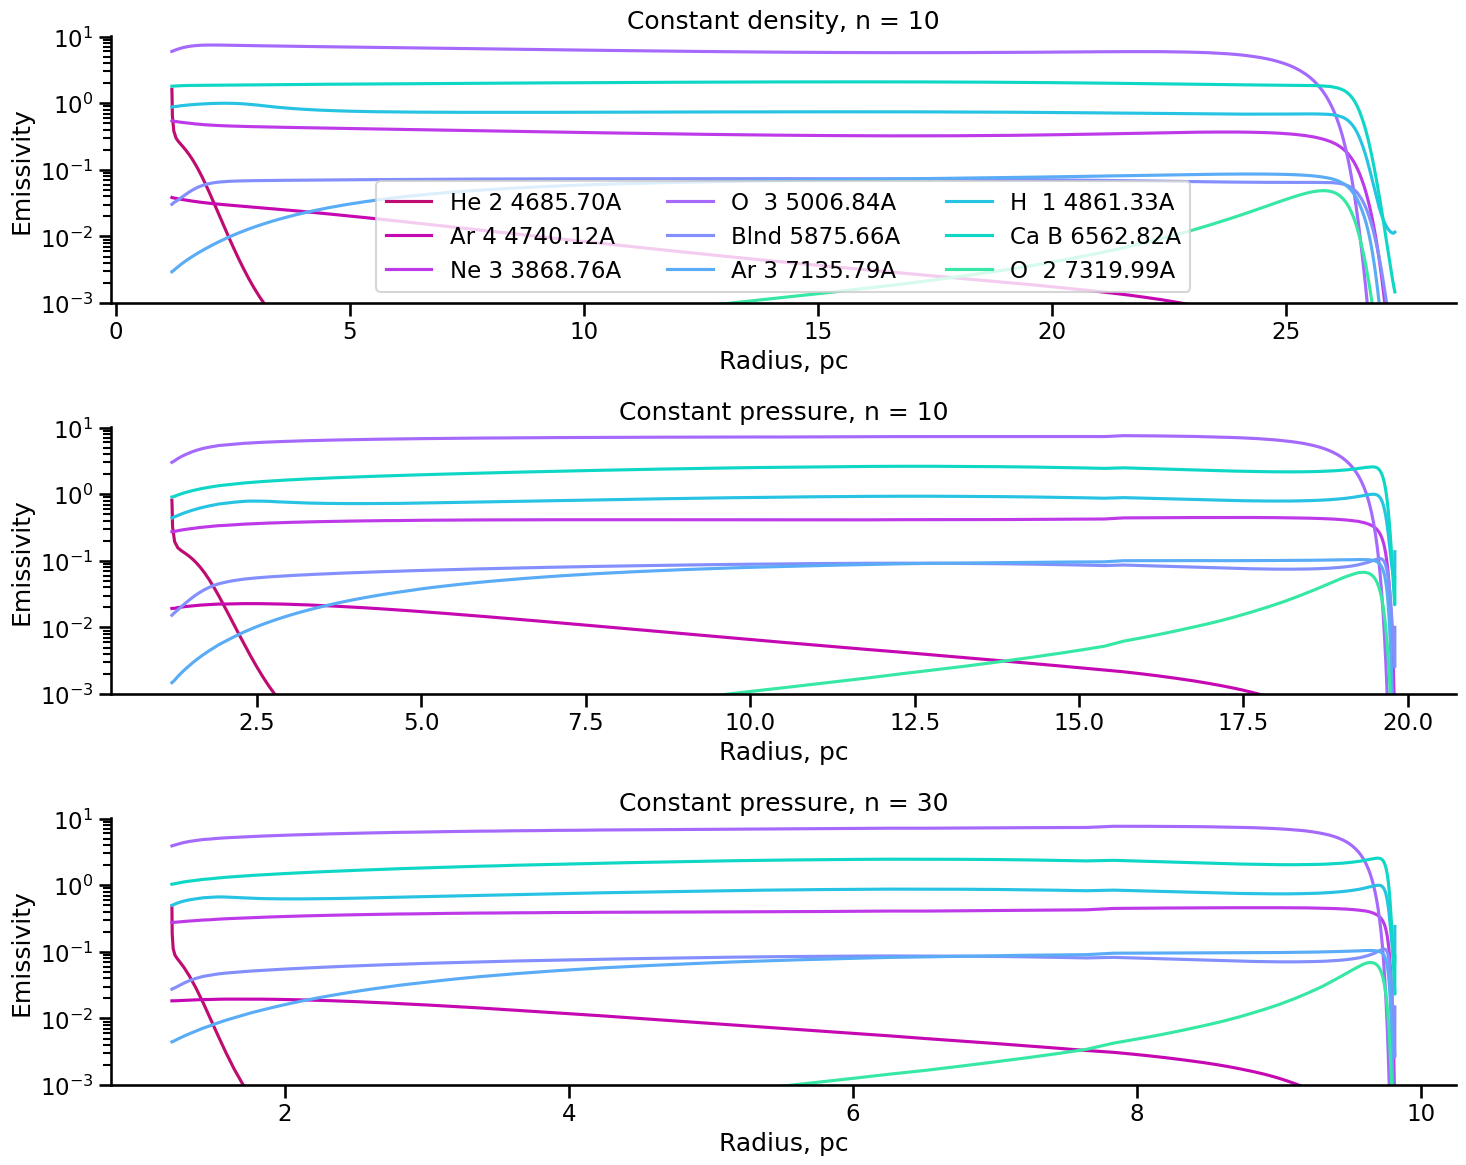

In [6]:
fig, axes = plt.subplots(3, 1, figsize=(15, 12))


# colnames = m.data["emis"].colnames[1:]

embands = [
 'He 2 4685.70A',
 'Ar 4 4740.12A',
 'Ne 3 3868.76A',
 'O  3 5006.84A',
 'Blnd 5875.66A',
 'Ar 3 7135.79A',
 'H  1 4861.33A',
 'Ca B 6562.82A',
 'O  2 7319.99A',
]

# Take N colors from named colormap in [0.15, 0.85] range in HEX
colors = cmr.take_cmap_colors(
    'cmr.neon', 
    len(embands), 
    cmap_range=(0.15, 0.85), 
    return_fmt='hex'
)

for m, ax in zip([m1, m2, m3], axes):
    radius = m.data["rad"]["radius"] * u.cm.to(u.pc) 
    hb = m.data["emis"]['H  1 4861.33A'] 
    for emband, color in zip(embands, colors):
        em = m.data["emis"][emband] 
        ax.plot(radius, em / hb.max(), label=emband, color=color)
    ax.set(
        yscale="log",
        ylim=[0.001, 10.1],
        xlabel="Radius, pc",
        ylabel="Emissivity",
    )
axes[0].legend(ncol=3)
axes[0].set_title("Constant density, n = 10")
axes[1].set_title("Constant pressure, n = 10")
axes[2].set_title("Constant pressure, n = 30")
sns.despine()
fig.tight_layout();

## Infrared lines and bands

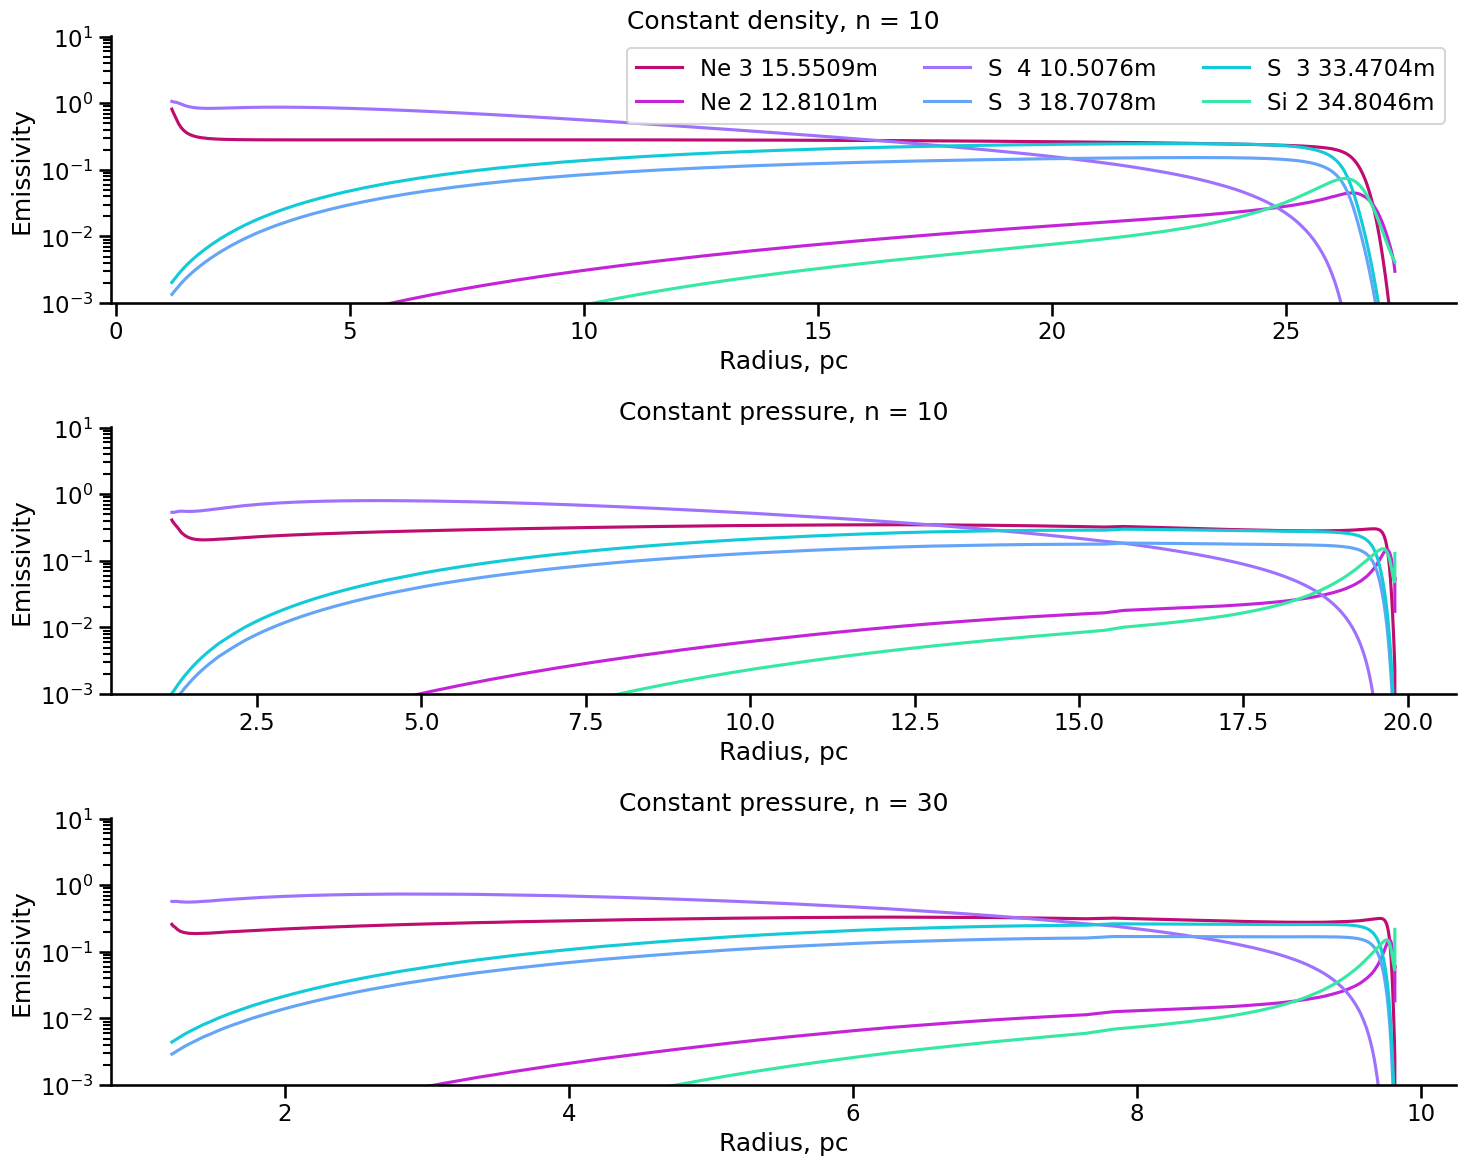

In [7]:
fig, axes = plt.subplots(3, 1, figsize=(15, 12))


# colnames = m.data["emis"].colnames[1:]

embands = [
 "Ne 3 15.5509m",
 "Ne 2 12.8101m",
 "S  4 10.5076m",
 "S  3 18.7078m",
 "S  3 33.4704m",
 "Si 2 34.8046m",
]

# Take N colors from named colormap in [0.15, 0.85] range in HEX
colors = cmr.take_cmap_colors(
    'cmr.neon', 
    len(embands), 
    cmap_range=(0.15, 0.85), 
    return_fmt='hex'
)

for m, ax in zip([m1, m2, m3], axes):
    radius = m.data["rad"]["radius"] * u.cm.to(u.pc) 
    hb = m.data["emis"]['H  1 4861.33A'] 
    for emband, color in zip(embands, colors):
        em = m.data["emis"][emband] 
        ax.plot(radius, em / hb.max(), label=emband, color=color)
    ax.set(
        yscale="log",
        ylim=[0.001, 10.1],
        xlabel="Radius, pc",
        ylabel="Emissivity",
    )
axes[0].legend(ncol=3)
axes[0].set_title("Constant density, n = 10")
axes[1].set_title("Constant pressure, n = 10")
axes[2].set_title("Constant pressure, n = 30")
sns.despine()
fig.tight_layout();

## Physical variables

Class to make dataframe of all cloudy files

In [127]:
class C:
    """Dictionary of pandas dataframes"""
    def __init__(self, d):
        for k, v in d.items():
            setattr(self, k, v.to_pandas())

In [9]:
m1.p = C(m1.data)
m2.p = C(m2.data)
m3.p = C(m3.data)

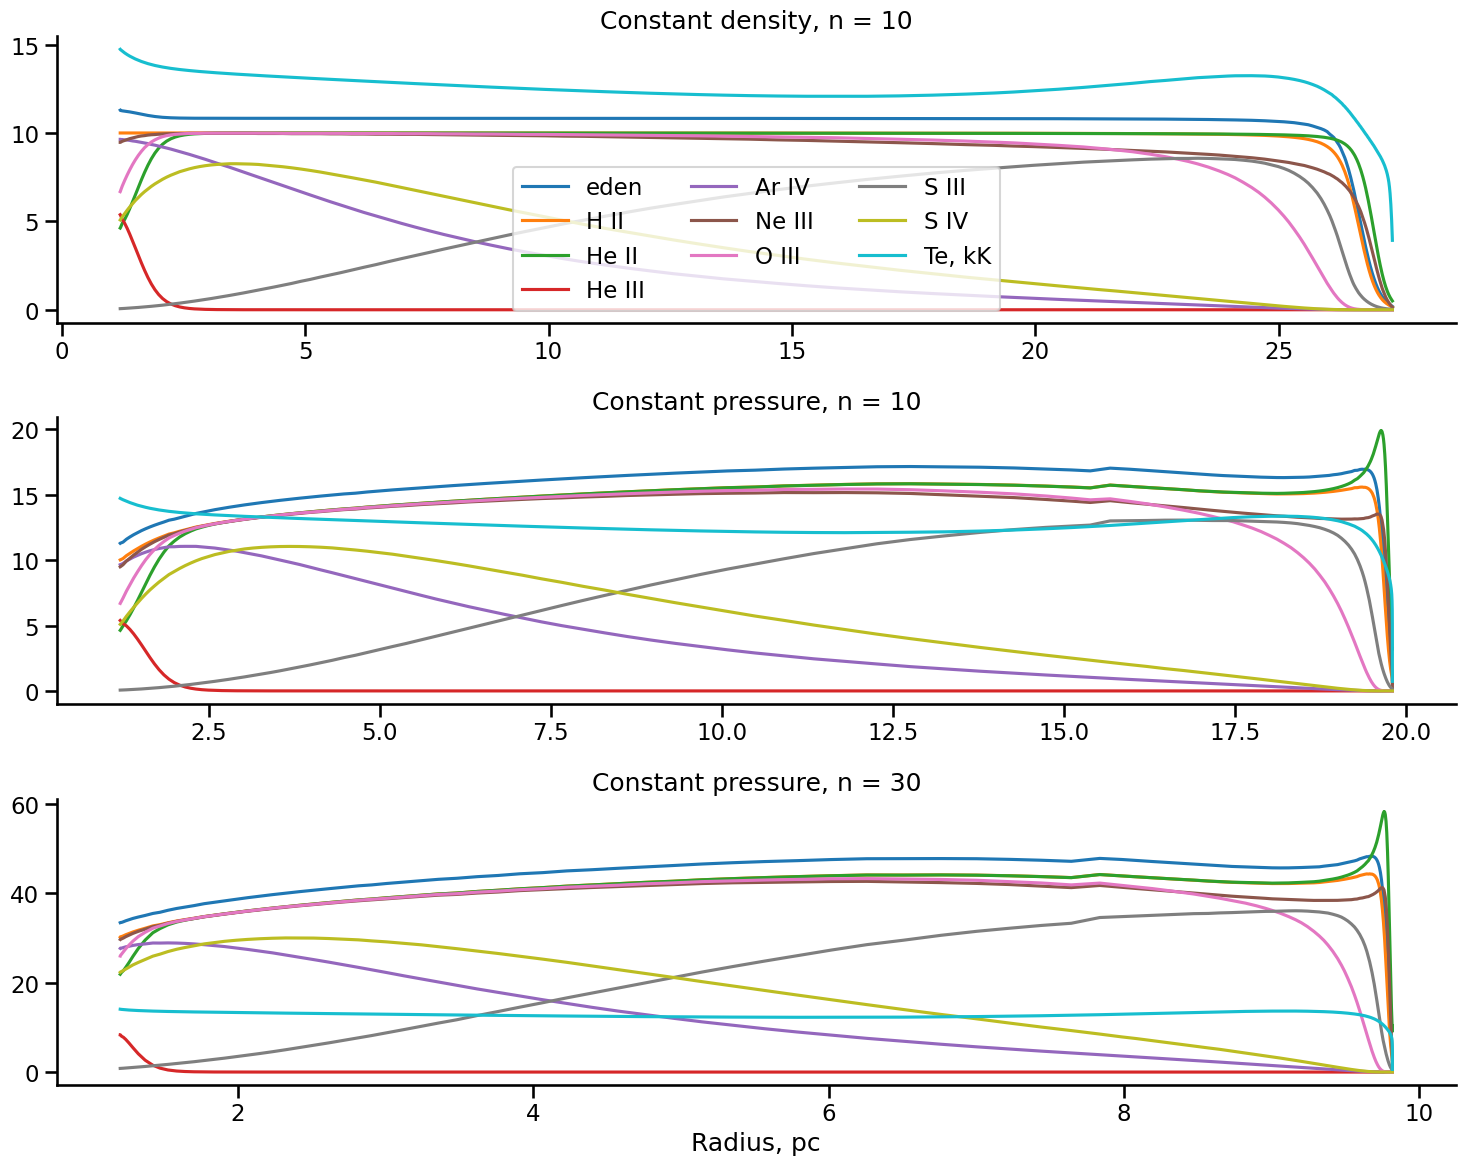

In [10]:
fig, axes = plt.subplots(3, 1, figsize=(15, 12))
for m, ax in zip([m1, m2, m3], axes):
    m.radius = m.p.rad.radius * u.cm.to(u.pc) 
    ax.plot(m.radius, m.p.ovr.eden, label="eden")
    ax.plot(m.radius, m.p.ovr.hden * m.p.ovr.HII, label="H II")
    ax.plot(m.radius, m.p.ovr.hden * m.p.ovr.HeII, label="He II")
    ax.plot(m.radius, m.p.ovr.hden * m.p.ovr.HeIII, label="He III")
    ax.plot(m.radius, m.p.ovr.hden * m.p.Ar["Ar+3"], label="Ar IV")
    ax.plot(m.radius, m.p.ovr.hden * m.p.Ne["Ne+2"], label="Ne III")
    ax.plot(m.radius, m.p.ovr.hden * m.p.O["O+2"], label="O III")
    ax.plot(m.radius, m.p.ovr.hden * m.p.S["S+2"], label="S III")
    ax.plot(m.radius, m.p.ovr.hden * m.p.S["S+3"], label="S IV")
    ax.plot(m.radius, 0.001 * m.p.ovr.Te, label="Te, kK")
axes[0].legend(ncol=3)
axes[0].set_title("Constant density, n = 10")
axes[1].set_title("Constant pressure, n = 10")
axes[2].set_title("Constant pressure, n = 30")
axes[-1].set(
    xlabel="Radius, pc",
)
sns.despine()
fig.tight_layout();

In [11]:
m.p.Ar

,depth,Ar,Ar+,Ar+2,Ar+3,Ar+4,Ar+5,Ar+6,Ar+7,Ar+8,Ar+9,Ar+10,Ar+11,Ar+12,Ar+13,Ar+14,Ar+15,Ar+16,Ar+17,Ar+18
0,2.628920e+14,1.050000e-11,0.000005,0.081100,0.916,0.00253,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.577350e+15,1.050000e-11,0.000005,0.081100,0.916,0.00252,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6.835200e+15,1.070000e-11,0.000005,0.081400,0.916,0.00248,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.786660e+16,1.110000e-11,0.000005,0.082300,0.915,0.00234,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6.656430e+16,1.190000e-11,0.000005,0.084000,0.914,0.00210,0.000004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,2.657420e+19,9.340000e-01,0.062500,0.003260,0.000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
198,2.657440e+19,9.350000e-01,0.061400,0.003130,0.000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199,2.657470e+19,9.370000e-01,0.060200,0.002980,0.000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
200,2.657500e+19,9.390000e-01,0.058400,0.002780,0.000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
m.p.cont

,Cont nu,incident,trans,DiffOut,net trans,reflc,total,reflin,outlin,lineID,cont,nLine
0,3.044730e-09,1.203000e+27,2.804000e+02,2.520000e+29,2.520000e+29,2.791000e+27,2.547000e+29,0.0,0.0,NaN,NaN,0.0
1,3.054900e-09,1.206000e+27,4.147000e+02,2.546000e+29,2.546000e+29,2.825000e+27,2.574000e+29,0.0,0.0,NaN,NaN,0.0
2,3.065100e-09,1.209000e+27,6.118000e+02,2.572000e+29,2.572000e+29,2.860000e+27,2.601000e+29,0.0,0.0,NaN,NaN,0.0
3,3.075330e-09,1.212000e+27,9.000000e+02,2.599000e+29,2.599000e+29,2.895000e+27,2.628000e+29,0.0,0.0,NaN,NaN,0.0
4,3.085600e-09,1.216000e+27,1.321000e+03,2.626000e+29,2.626000e+29,2.931000e+27,2.655000e+29,0.0,0.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9239,6.235130e+06,3.729000e+27,3.729000e+27,0.000000e+00,3.729000e+27,4.983000e+22,3.729000e+27,0.0,0.0,NaN,NaN,0.0
9240,6.424540e+06,3.619000e+27,3.619000e+27,0.000000e+00,3.619000e+27,4.712000e+22,3.619000e+27,0.0,0.0,NaN,NaN,0.0
9241,6.619710e+06,3.512000e+27,3.512000e+27,0.000000e+00,3.512000e+27,4.456000e+22,3.512000e+27,0.0,0.0,NaN,NaN,0.0
9242,6.820810e+06,3.409000e+27,3.409000e+27,0.000000e+00,3.409000e+27,4.214000e+22,3.409000e+27,0.0,0.0,NaN,NaN,0.0


In [13]:
import astropy.constants as const

In [14]:
wavnorm = (const.h * const.c / u.rydberg).to(u.micron)
freqnorm = (u.rydberg / const.h).to(u.Hz)
sednorm = (u.erg / u.s) / const.L_sun.cgs
#m.p.cont["Cont  nu"] * wavnorm 
wavs = wavnorm / m1.data["cont"]["Cont  nu"]
freqs = freqnorm * m1.data["cont"]["Cont  nu"]
sednorm

<Quantity 2.6123302e-34>

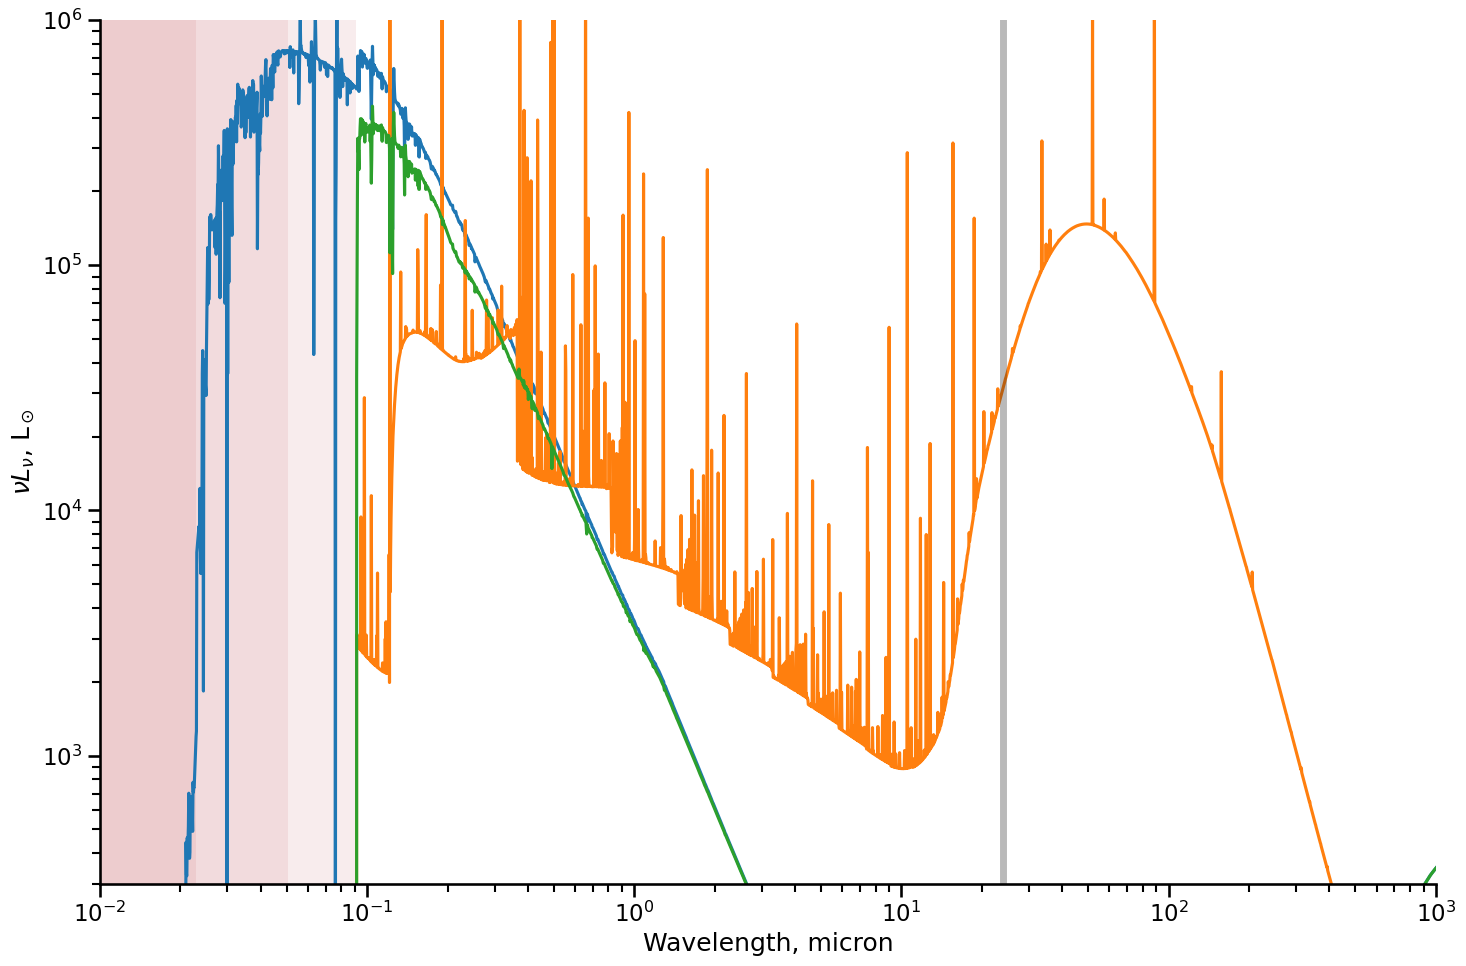

In [15]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(wavs, sednorm * m3.data["cont"]["incident"])
ax.plot(wavs, sednorm * m3.data["cont"]["DiffOut"])
ax.plot(wavs, sednorm * m3.data["cont"]["trans"])

ax.axvline(24.0, lw=5, color="k", alpha=0.3)
for ip in 1.0, 1.8, 4.0:
    ax.axvspan(0, 0.0912/ip, lw=0, color="r", alpha=0.1)
ax.set(
    xscale="log",
    yscale="log",
    xlim=[1e-2, 1e3],
    ylim=[300, 1e6],
    xlabel="Wavelength, micron",
    ylabel=r"$\nu L_\nu$, L$_\odot$",
)
sns.despine()
fig.tight_layout();

In [16]:
m4 = cloudytab.CloudyModel(ROOT / "cloudy/models/w3-n010-p-r08")
m5 = cloudytab.CloudyModel(ROOT / "cloudy/models/w3-n005-p-r08")
m6 = cloudytab.CloudyModel(ROOT / "cloudy/models/w3-n100-p-r08")
m7 = cloudytab.CloudyModel(ROOT / "cloudy/models/w3-n050-p-r08")
m8 = cloudytab.CloudyModel(ROOT / "cloudy/models/w3-n010-d01-r08")

In [17]:
m4.data.keys()

dict_keys(['Cl', 'gdrift', 'lina', 'N', 'S', 'ovr', 'O', 'gtemp', 'Si', 'phys', 'Ne', 'gpot', 'Ar', 'gabun', 'C', 'gcharge', 'pre', 'gcont', 'lya', 'rad', 'emis', 'cont'])

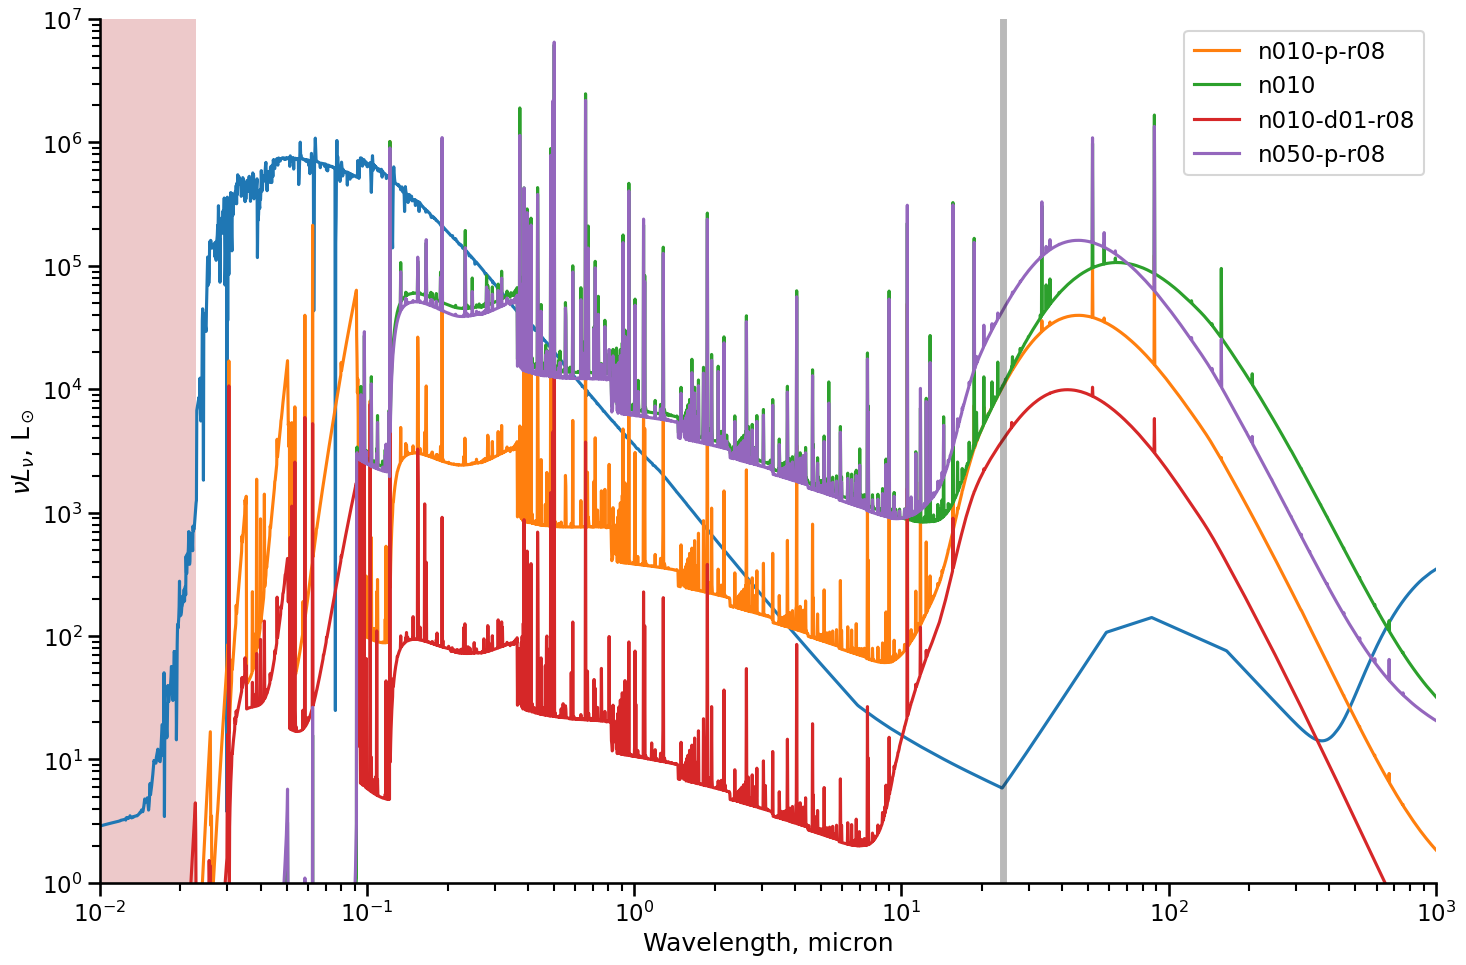

In [18]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(wavs, sednorm * m4.data["cont"]["incident"])
ax.plot(wavs, sednorm * m4.data["cont"]["DiffOut"], label="n010-p-r08")
ax.plot(wavs, sednorm * m1.data["cont"]["DiffOut"], label="n010")
ax.plot(wavs, sednorm * m8.data["cont"]["DiffOut"], label="n010-d01-r08")
ax.plot(wavs, sednorm * m7.data["cont"]["DiffOut"], label="n050-p-r08")

ax.axvline(24.0, lw=5, color="k", alpha=0.3)
ax.axvspan(0, 0.0912/4, lw=0, color="r", alpha=0.3)
ax.set(
    xscale="log",
    yscale="log",
    xlim=[1e-2, 1e3],
    ylim=[1.0, 1.0e7],
    xlabel="Wavelength, micron",
    ylabel=r"$\nu L_\nu$, L$_\odot$",
)
ax.legend()
sns.despine()
fig.tight_layout();

In [19]:
for m in m4, m5, m6, m7, m8:
    m.p = C(m.data)

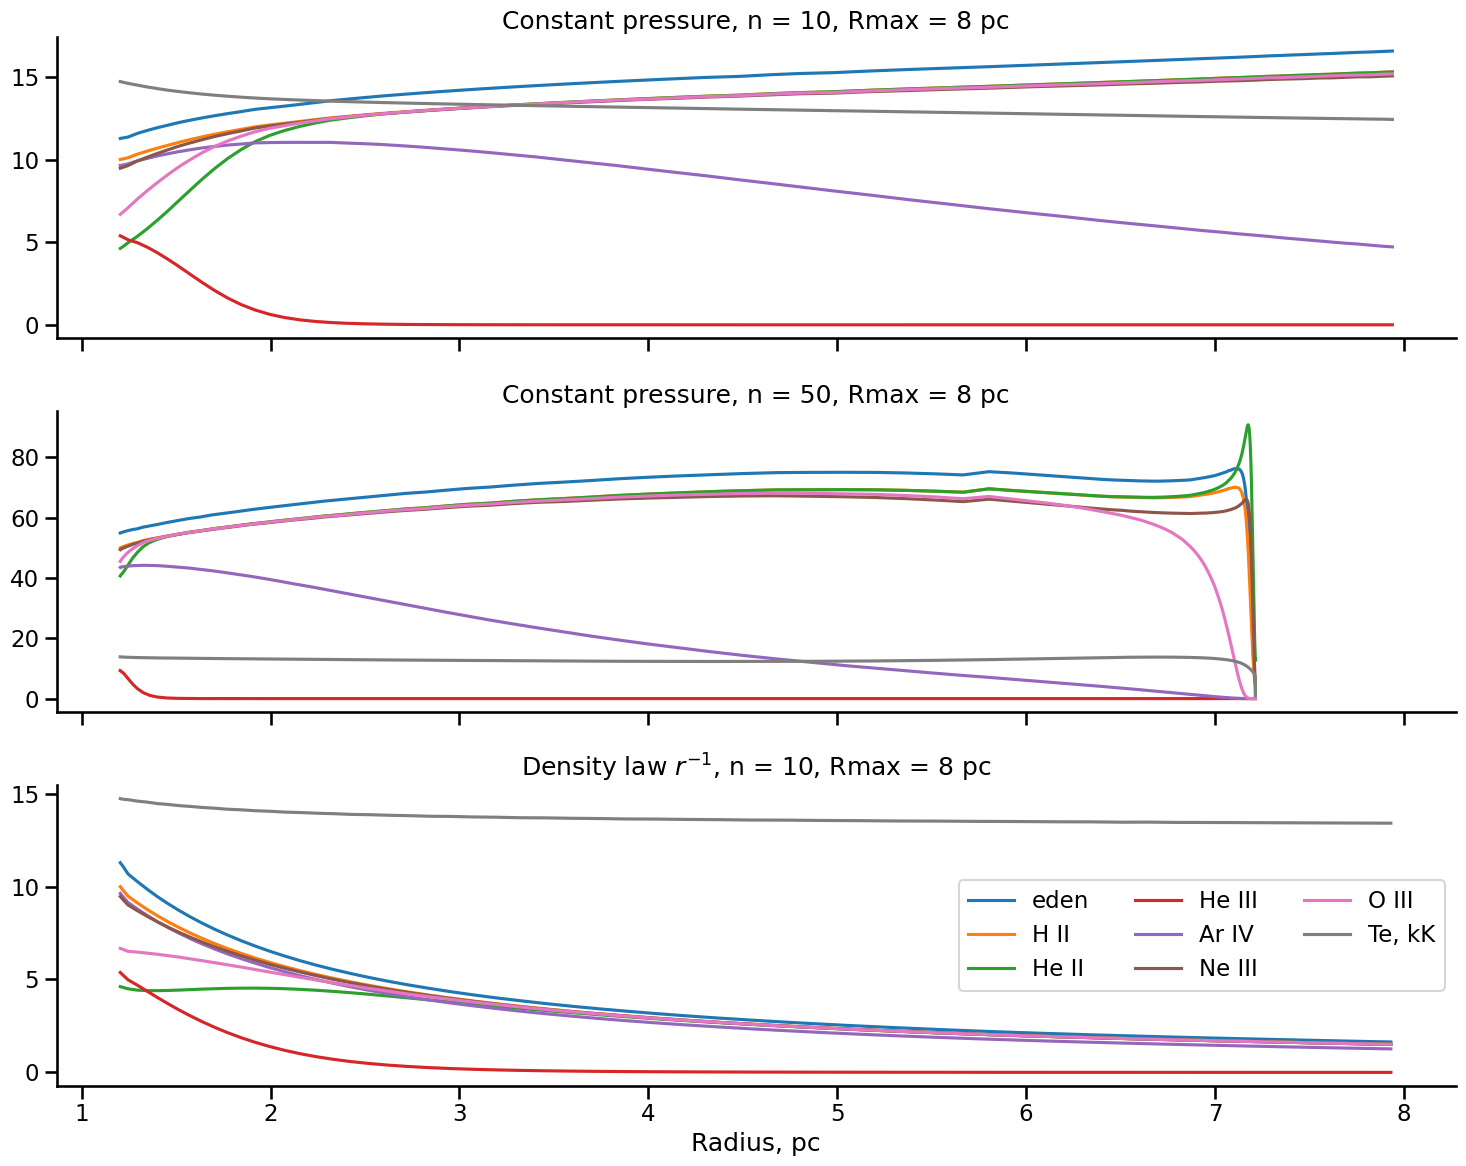

In [20]:
fig, axes = plt.subplots(3, 1, figsize=(15, 12), sharex=True)
for m, ax in zip([m4, m7, m8], axes):
    m.radius = m.p.rad.radius * u.cm.to(u.pc) 
    ax.plot(m.radius, m.p.ovr.eden, label="eden")
    ax.plot(m.radius, m.p.ovr.hden * m.p.ovr.HII, label="H II")
    ax.plot(m.radius, m.p.ovr.hden * m.p.ovr.HeII, label="He II")
    ax.plot(m.radius, m.p.ovr.hden * m.p.ovr.HeIII, label="He III")
    ax.plot(m.radius, m.p.ovr.hden * m.p.Ar["Ar+3"], label="Ar IV")
    ax.plot(m.radius, m.p.ovr.hden * m.p.Ne["Ne+2"], label="Ne III")
    ax.plot(m.radius, m.p.ovr.hden * m.p.O["O+2"], label="O III")
    ax.plot(m.radius, 0.001 * m.p.ovr.Te, label="Te, kK")
axes[-1].legend(ncol=3)
axes[0].set_title("Constant pressure, n = 10, Rmax = 8 pc")
axes[1].set_title("Constant pressure, n = 50, Rmax = 8 pc")
axes[2].set_title("Density law $r^{-1}$, n = 10, Rmax = 8 pc")
axes[-1].set(
    xlabel="Radius, pc",
)
sns.despine()
fig.tight_layout();

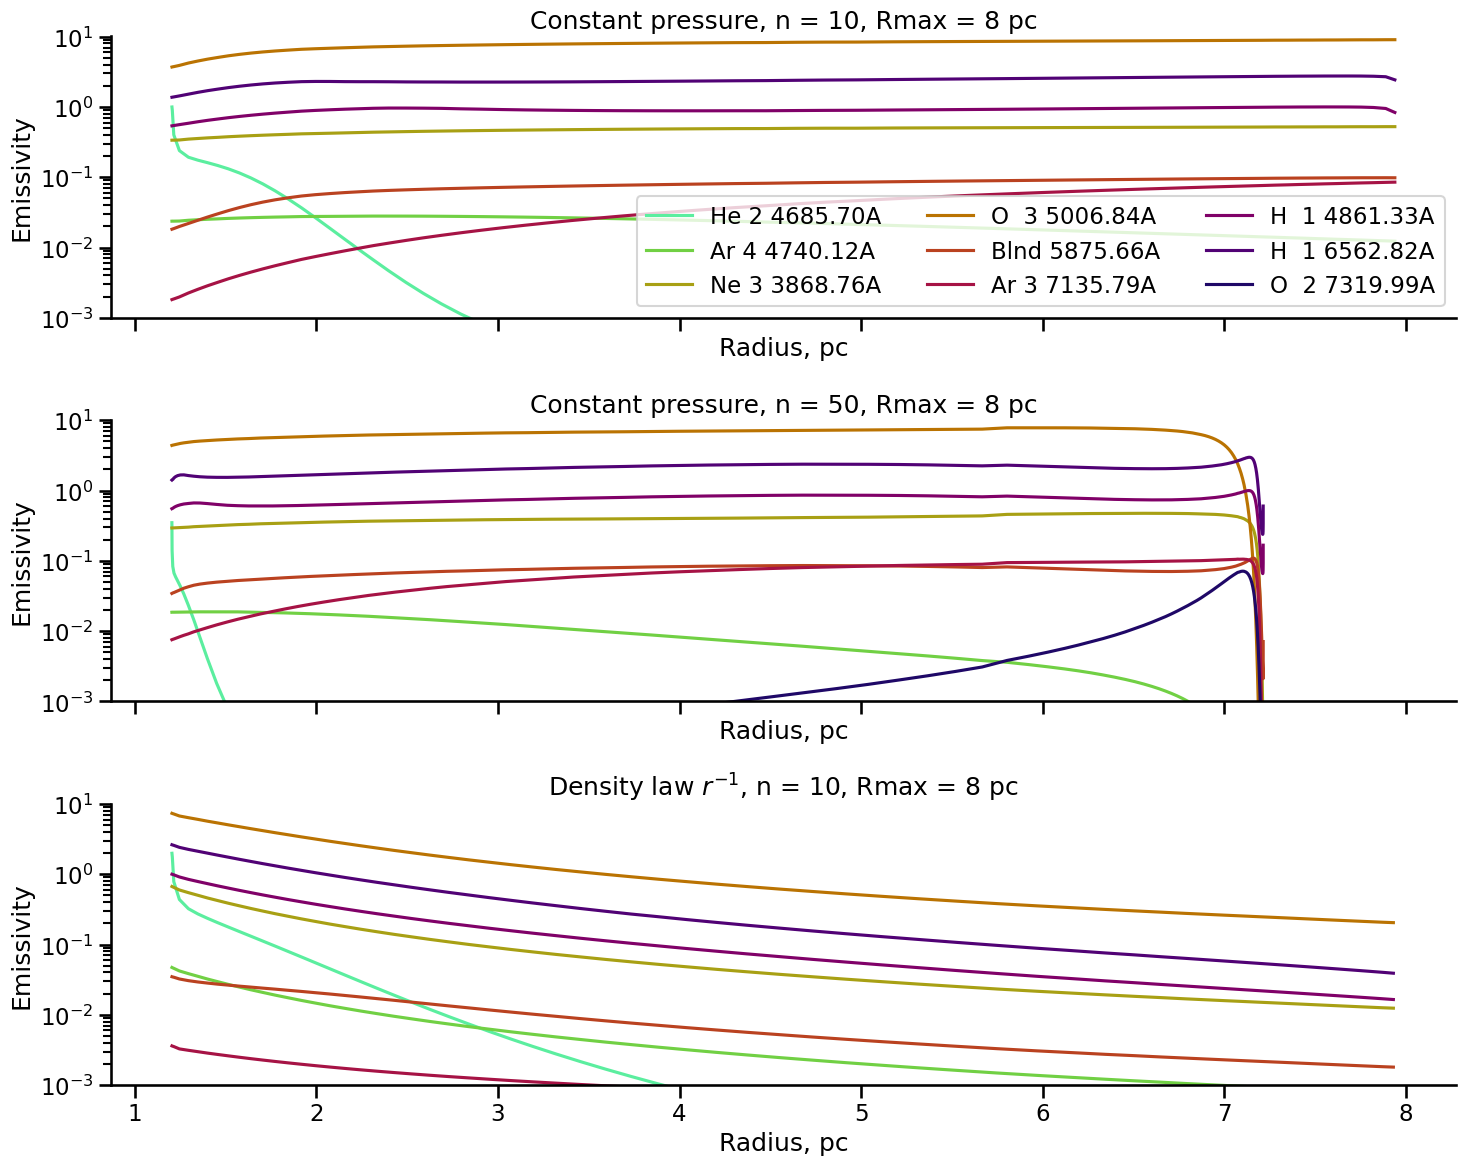

In [33]:
fig, axes = plt.subplots(3, 1, figsize=(15, 12), sharex=True)


# colnames = m.data["emis"].colnames[1:]

embands = [
 'He 2 4685.70A',
 'Ar 4 4740.12A',
 'Ne 3 3868.76A',
 'O  3 5006.84A',
 'Blnd 5875.66A',
 'Ar 3 7135.79A',
 'H  1 4861.33A',
 'H  1 6562.82A',
 'O  2 7319.99A',
]

# Take N colors from named colormap in [0.15, 0.85] range in HEX
colors = cmr.take_cmap_colors(
    'cmr.chroma_r', 
    len(embands), 
    cmap_range=(0.15, 0.85), 
    return_fmt='hex'
)

for m, ax in zip([m4, m7, m8], axes):
    radius = m.data["rad"]["radius"] * u.cm.to(u.pc) 
    hb = m.data["emis"]['H  1 4861.33A'] 
    for emband, color in zip(embands, colors):
        em = m.data["emis"][emband] 
        ax.plot(radius, em / hb.max(), label=emband, color=color)
    ax.set(
        yscale="log",
        ylim=[0.001, 10.1],
        xlabel="Radius, pc",
        ylabel="Emissivity",
    )
axes[0].legend(ncol=3)
axes[0].set_title("Constant pressure, n = 10, Rmax = 8 pc")
axes[1].set_title("Constant pressure, n = 50, Rmax = 8 pc")
axes[2].set_title("Density law $r^{-1}$, n = 10, Rmax = 8 pc")
sns.despine()
fig.tight_layout();

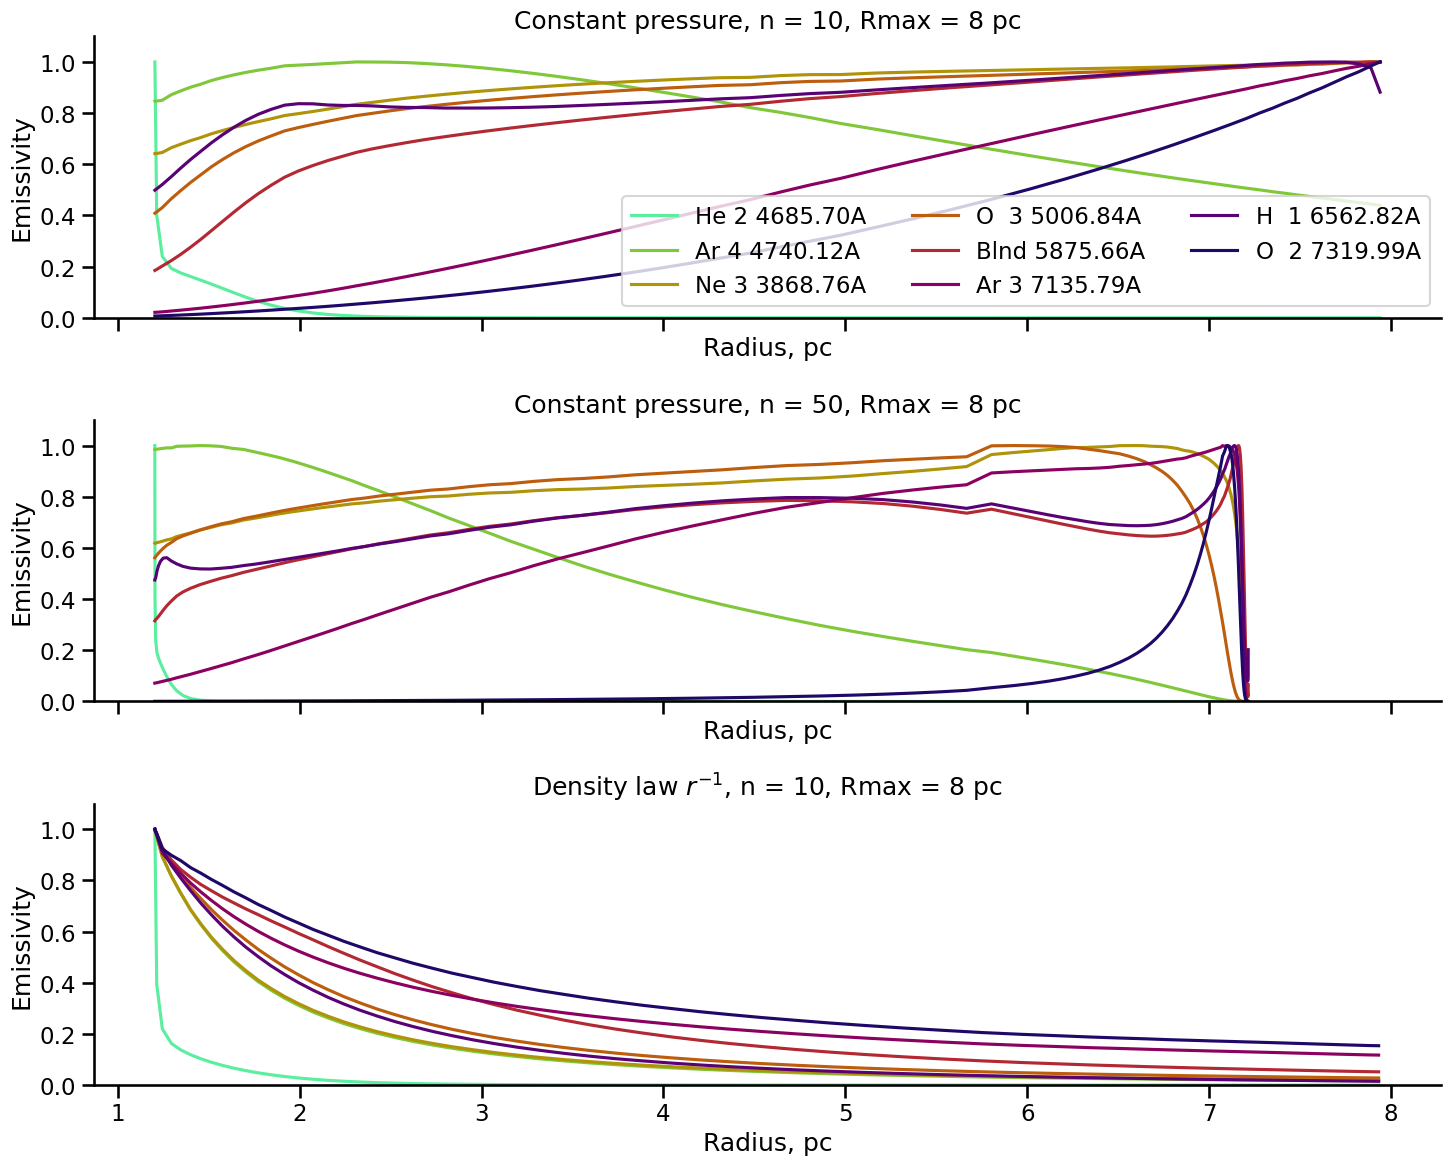

In [34]:
fig, axes = plt.subplots(3, 1, figsize=(15, 12), sharex=True)


# colnames = m.data["emis"].colnames[1:]

embands = [
 'He 2 4685.70A',
 'Ar 4 4740.12A',
 'Ne 3 3868.76A',
 'O  3 5006.84A',
 'Blnd 5875.66A',
 'Ar 3 7135.79A',
# 'H  1 4861.33A',
 'H  1 6562.82A',
 'O  2 7319.99A',
]

# Take N colors from named colormap in [0.15, 0.85] range in HEX
colors = cmr.take_cmap_colors(
    'cmr.chroma_r', 
    len(embands), 
    cmap_range=(0.15, 0.85), 
    return_fmt='hex'
)

for m, ax in zip([m4, m7, m8], axes):
    radius = m.data["rad"]["radius"] * u.cm.to(u.pc) 
    hb = m.data["emis"]['H  1 4861.33A'] 
    for emband, color in zip(embands, colors):
        em = m.data["emis"][emband] 
        ax.plot(radius, em / em.max(), label=emband, color=color)
    ax.set(
        yscale="linear",
        ylim=[0.00, 1.1],
        xlabel="Radius, pc",
        ylabel="Emissivity",
    )
axes[0].legend(ncol=3)
axes[0].set_title("Constant pressure, n = 10, Rmax = 8 pc")
axes[1].set_title("Constant pressure, n = 50, Rmax = 8 pc")
axes[2].set_title("Density law $r^{-1}$, n = 10, Rmax = 8 pc")
sns.despine()
fig.tight_layout();

## Brightness versus projected radius in spherical symmetry

First approximation to bow shock shape is that it is a hemisphere

Therefore at each projected radius $b$, the brightness is given by:
$$
S(b) = \int_{-\infty}^\infty j(r) \, dz
$$
where
$$
r^2 = b^2 + z^2 
\quad \Rightarrow \quad
2 r\, dr = 2 z\, dz
\quad \Rightarrow \quad
dz = \frac{r}{z}\, dr
$$
Therefore
$$
S(b) = 2 \int_b^\infty j(r) \, \frac{r}{(r^2 - b^2)^{1/2}} \, dr
$$

### Naive implementation of surface brightness intergral

This version makes a regular grid of impact parameter and a regular grid of dummy radii for the integration

In [72]:
nb = 200
def brightness_regrid(r, dr, e, nb, verbose=False):
    b = np.linspace(0.0, r.max(), nb)
    drmin = np.min(dr)
    drmin = np.percentile(dr, 0.5)
    _r = np.arange(0.0, r.max(), step=drmin)
    nr = len(_r)
    if verbose:
        print(f"{nr=}, {drmin=:.2e}")
#    _r = np.linspace(0.0, r.max(), 30 * nb + 5)
    _e = np.interp(_r, r, e, left=0.0, right=0.0)
    _dr = [r.max() / nr] * nr
    bgrid = np.stack([b] * nr, axis=0)
    rgrid = np.stack([_r] * nb, axis=1)
    egrid = np.stack([_e] * nb, axis=1)
    drgrid = np.stack([_dr] * nb, axis=1)
    rgrid[rgrid <= bgrid + 0.5 * drgrid] = np.nan
    sb = 2 * np.nansum(egrid * rgrid * drgrid / (drgrid + np.sqrt(rgrid**2 - bgrid**2)), axis=0)
    return b, sb

### Alternatively, we can do the integral in z

This is better, since we have no singularity.  Since we have discrete points, we can do it without having to do any interpolation, using either trapezium or simpson. 

In [144]:
from scipy import integrate
def brightness_discrete(r, dr, e, n_inner=50, verbose=False, integrator=np.trapz):
    """Perform integral of surface brightness along line of sight

    Suitable values for `integrator` are numpy.trapz or scipy.integrate.simpson
    """

    # Use the Cloudy radial points with additional uniform grid from origin to inner boundary
    b_inner = np.linspace(0.0, r.min(), num=n_inner, endpoint=False)
    b = np.concatenate((b_inner, r))
    
    sb = np.zeros_like(b)
    # For each impact parameter
    for i, _b in enumerate(b):
        # Select all radii greater than impact parameter
        m = r >= _b
        # Array of LOS positions for each of these radii
        z = np.sqrt(r[m]**2 - _b**2)
        _e = e[m]
        # Integrate along z to find brightness
        sb[i] = 2 * integrator(_e, z)
    return b, sb

In [145]:
brightness = brightness_discrete

In [147]:
m = m8
nb = None
r = m.data["rad"]["radius"]
dr = m.data["rad"]["dr"]
e = m.data["emis"]["He 2 4685.70A"]
b, s = brightness(r, dr, e)
len(s)

114

In [130]:
m7.data["emis"].colnames[]

['depth',
 'He 2 4685.70A',
 'O  1 6300.30A',
 'O  2 7319.99A',
 'O  2 7318.92A',
 'O  3 4363.21A',
 'O  3 5006.84A',
 'Ar 3 7135.79A',
 'Ar 4 4711.26A',
 'Ar 4 4740.12A',
 'Ar 4 7332.15A',
 'Ar 3 7751.11A',
 'Ne 3 3868.76A',
 'Ne 4 4724.17A',
 'S  3 6312.06A',
 'S  3 9068.62A',
 'H  1 4861.33A',
 'H  1 6562.82A',
 'Ca B 6562.82A',
 'Blnd 5875.66A',
 'Ne 3 15.5509m',
 'Ne 2 12.8101m',
 'S  4 10.5076m',
 'S  3 18.7078m',
 'S  3 33.4704m',
 'Si 2 34.8046m',
 'Ar 3 8.98898m',
 'PAHC 6.90000m',
 'PAHC 10.9000m',
 'PAH 11.3000m',
 'PAHC 14.1000m',
 'nFnu 15.6901m',
 'nFnu 19.6199m',
 'nFnu 24.7829m',
 'nFnu 30.8695m',
 'nFnu 41.2152m',
 'nFnu 60.8322m',
 'IRAC 3.60000m',
 'IRAC 4.50000m',
 'IRAC 5.80000m',
 'IRAC 8.00000m',
 'F12 12.0000m',
 'F25 25.0000m',
 'MIPS 24.0000m',
 'PAC1 70.0000m',
 'PAC2 100.000m',
 'PAC3 160.000m']

### Pre-calculate the surface brightness profiles for all models


In [133]:
from astropy.table import Table

def sb_table(model):
    r = model.data["rad"]["radius"]
    dr = model.data["rad"]["dr"]    
    elabels = model.data["emis"].colnames[1:] # skip the depth column
    sbdict = {}
    for elabel in elabels:
        sbdict["b"], sbdict[elabel] = brightness(r, dr, model.data["emis"][elabel])
    return Table(sbdict)

In [149]:
%%timeit -n 1 -r 1
for m in m1, m2, m3, m4, m5, m6, m7, m8:
    m.sb = sb_table(m)

19.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


### Optical line surface brightness

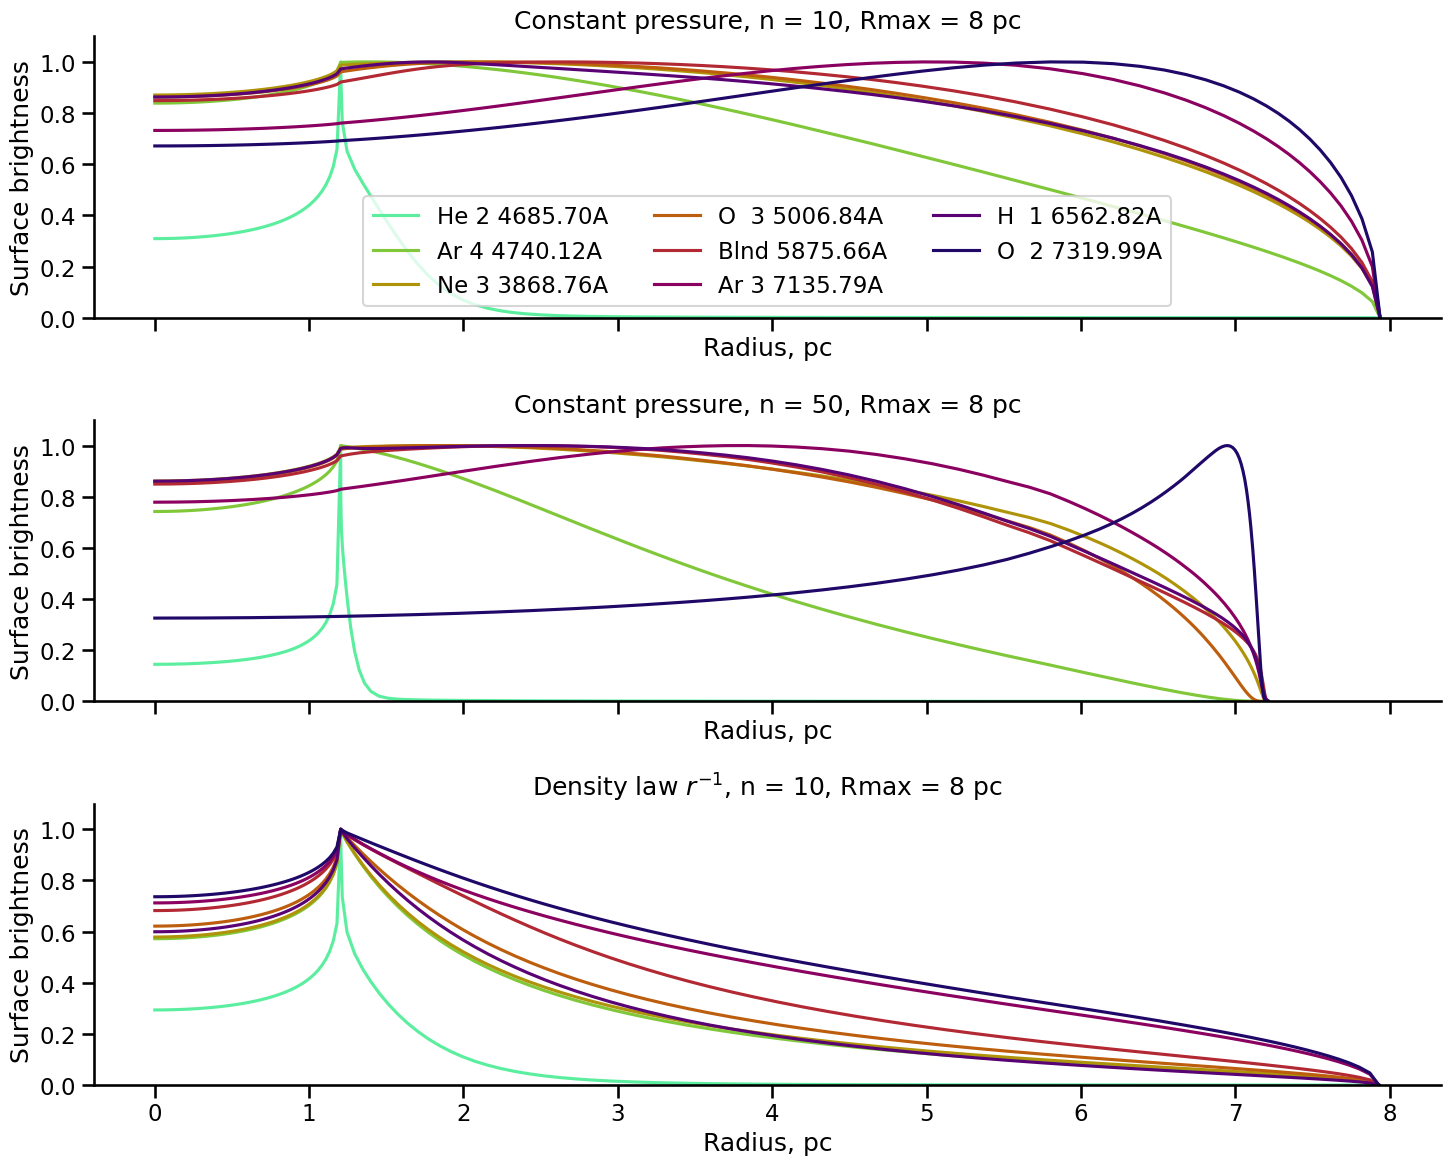

In [150]:
fig, axes = plt.subplots(3, 1, figsize=(15, 12), sharex=True)


# colnsmes = m.data["emis"].colnames[1:]

embands = [
 'He 2 4685.70A',
 'Ar 4 4740.12A',
 'Ne 3 3868.76A',
 'O  3 5006.84A',
 'Blnd 5875.66A',
 'Ar 3 7135.79A',
 'H  1 6562.82A',
 'O  2 7319.99A',
]

# Take N colors from named colormap in [0.15, 0.85] range in HEX
colors = cmr.take_cmap_colors(
    'cmr.chroma_r', 
    len(embands), 
    cmap_range=(0.15, 0.85), 
    return_fmt='hex'
)

for m, ax in zip([m4, m7, m8], axes):
    radius = m.sb["b"] * u.cm.to(u.pc) 
    for emband, color in zip(embands, colors):
        sb = m.sb[emband]
        ax.plot(radius, sb / sb.max(), "-", label=emband, color=color)
    ax.set(
        yscale="linear",
        ylim=[0.00, 1.1],
        xlabel="Radius, pc",
        ylabel="Surface brightness",
    )
axes[0].legend(ncol=3)
axes[0].set_title("Constant pressure, n = 10, Rmax = 8 pc")
axes[1].set_title("Constant pressure, n = 50, Rmax = 8 pc")
axes[2].set_title("Density law $r^{-1}$, n = 10, Rmax = 8 pc")
sns.despine()
fig.tight_layout();

### IR line and continuum surface brightness

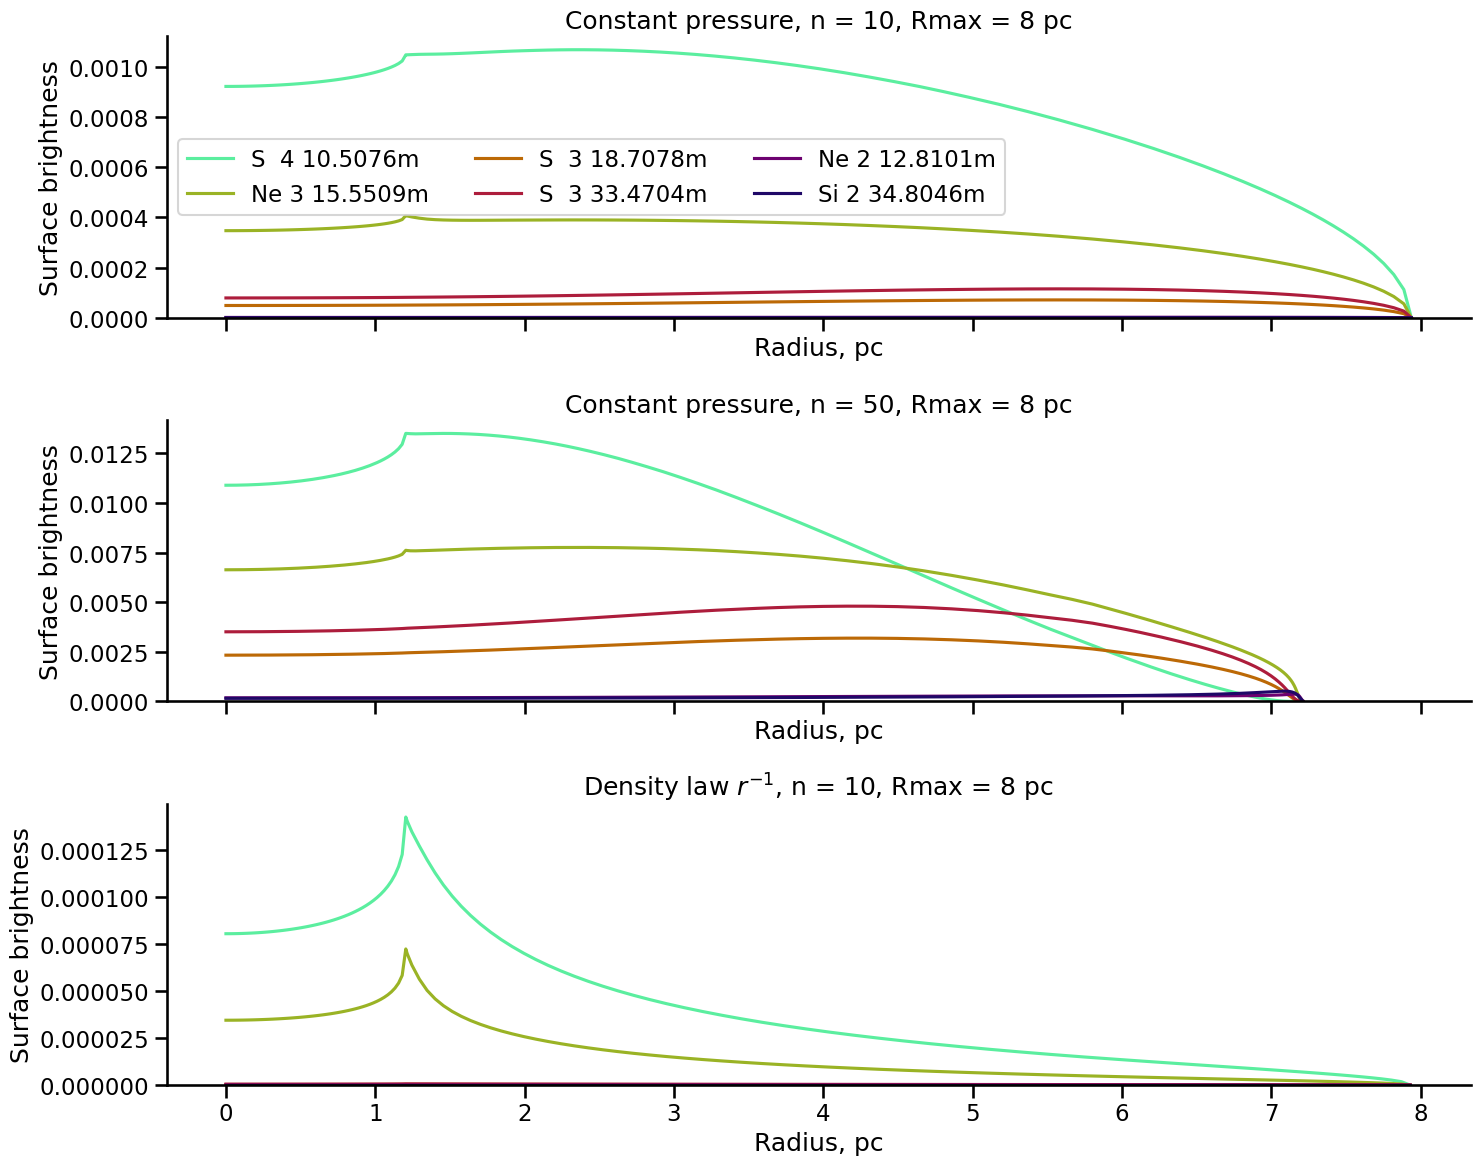

In [152]:
fig, axes = plt.subplots(3, 1, figsize=(15, 12), sharex=True)


# colnames = m.data["emis"].colnames[1:]

embands = [
 "S  4 10.5076m",
 "Ne 3 15.5509m",
 "S  3 18.7078m",
 "S  3 33.4704m",
 "Ne 2 12.8101m",
 "Si 2 34.8046m",
]
normband = "S  3 18.7078m"
sbnorm = m.sb[normband].mean()

# Take N colors from named colormap in [0.15, 0.85] range in HEX
colors = cmr.take_cmap_colors(
    'cmr.chroma_r', 
    len(embands), 
    cmap_range=(0.15, 0.85), 
    return_fmt='hex'
)

for m, ax in zip([m4, m7, m8], axes):
    radius = m.sb["b"] * u.cm.to(u.pc) 
    for emband, color in zip(embands, colors):
        sb = m.sb[emband]
        ax.plot(radius, sb, label=emband, color=color)
    ax.set(
        yscale="linear",
        ylim=[0.00, None],
        xlabel="Radius, pc",
        ylabel="Surface brightness",
    )
axes[0].legend(ncol=3)
axes[0].set_title("Constant pressure, n = 10, Rmax = 8 pc")
axes[1].set_title("Constant pressure, n = 50, Rmax = 8 pc")
axes[2].set_title("Density law $r^{-1}$, n = 10, Rmax = 8 pc")
sns.despine()
fig.tight_layout();

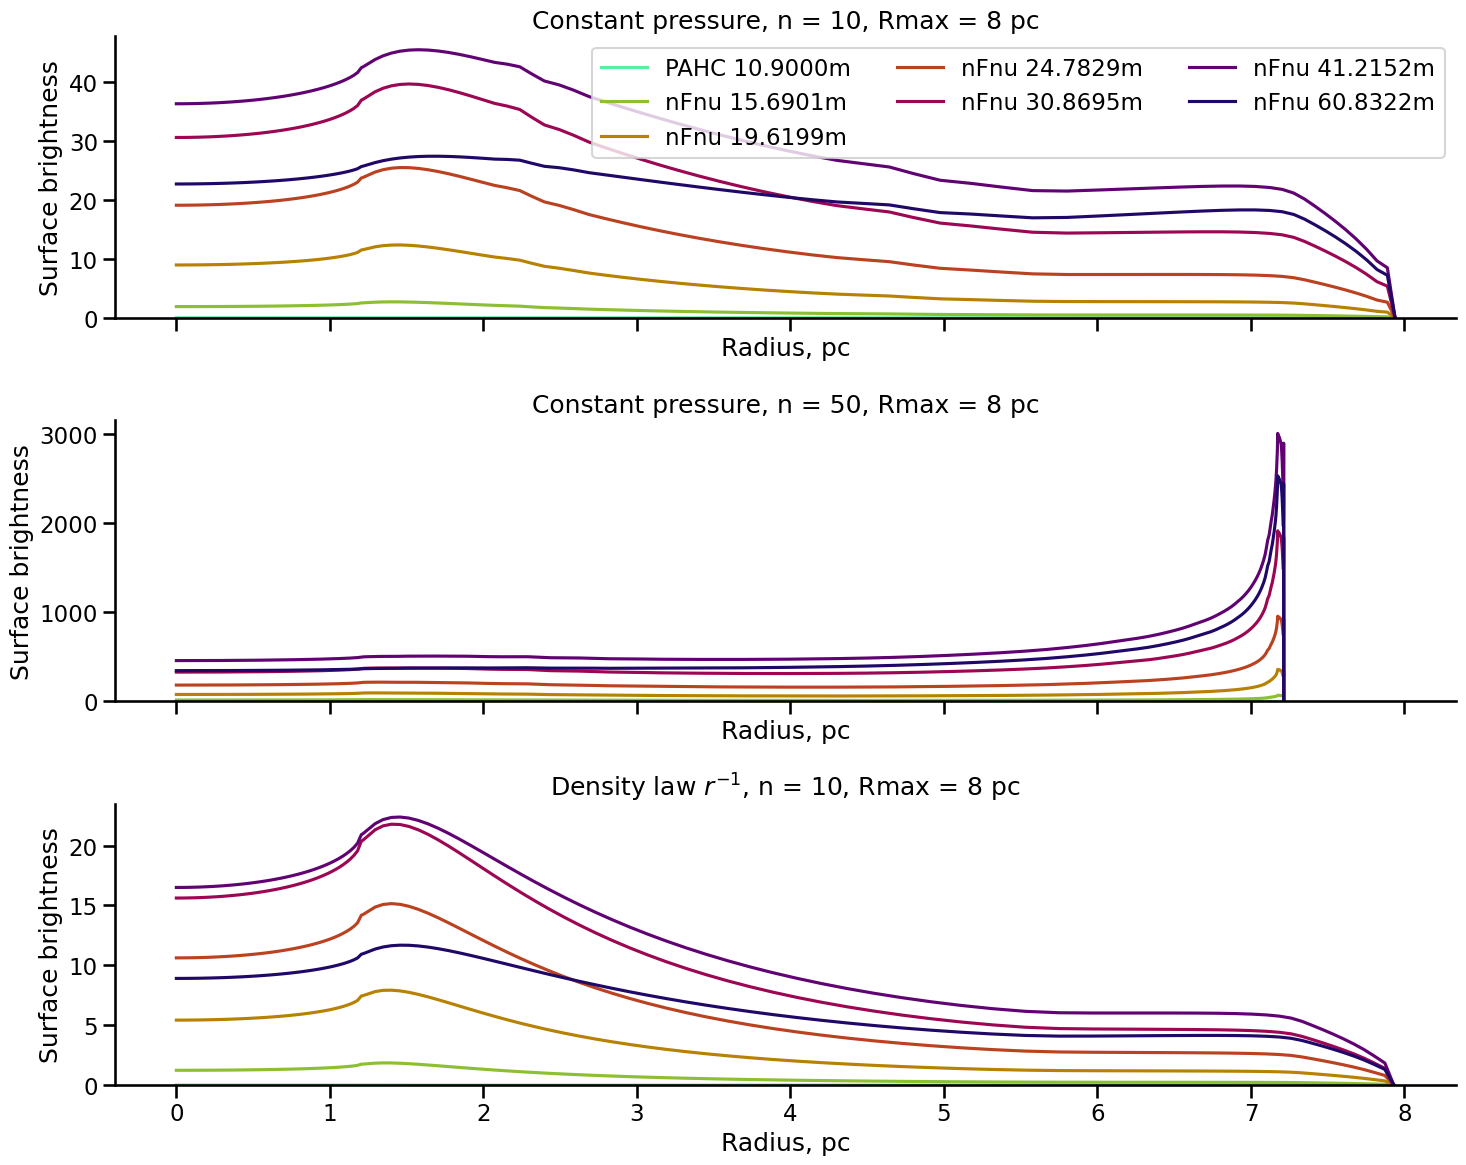

In [153]:
fig, axes = plt.subplots(3, 1, figsize=(15, 12), sharex=True)


# colnames = m.data["emis"].colnames[1:]

embands = [
 "PAHC 10.9000m",
 "nFnu 15.6901m",
 "nFnu 19.6199m",
 "nFnu 24.7829m",
 "nFnu 30.8695m",
 "nFnu 41.2152m",
 "nFnu 60.8322m",
]
normband = "nFnu 15.6901m"
sbnorm = m.sb[normband].mean()

# Take N colors from named colormap in [0.15, 0.85] range in HEX
colors = cmr.take_cmap_colors(
    'cmr.chroma_r', 
    len(embands), 
    cmap_range=(0.15, 0.85), 
    return_fmt='hex'
)

for m, ax in zip([m4, m7, m8], axes):
    radius = m.sb["b"] * u.cm.to(u.pc)
    for emband, color in zip(embands, colors):
        sb = m.sb[emband]
        ax.plot(radius, sb / sbnorm, label=emband, color=color)
    ax.set(
        yscale="linear",
        ylim=[0.00, None],
        xlabel="Radius, pc",
        ylabel="Surface brightness",
    )
axes[0].legend(ncol=3)
axes[0].set_title("Constant pressure, n = 10, Rmax = 8 pc")
axes[1].set_title("Constant pressure, n = 50, Rmax = 8 pc")
axes[2].set_title("Density law $r^{-1}$, n = 10, Rmax = 8 pc")
sns.despine()
fig.tight_layout();

## Line ratio diagnostics

I can look at the same infrared line ratios as in the Spitzer data.  And also at optical ratios

In [199]:
ratio_dict = {
    "c15-11-mir": ("nFnu 15.6901m", "PAHC 10.9000m"),
    "c25-15-mir": ("nFnu 24.7829m", "nFnu 15.6901m"),
    "s43-mir": ("S  4 10.5076m", "S  3 18.7078m"),
    "ne3s3-mir": ("Ne 3 15.5509m", "S  3 18.7078m"),
    "ar43-opt": ("Ar 4 4740.12A", "Ar 3 7135.79A"),
    "o3hb-opt": ("O  3 5006.84A", "H  1 4861.33A"),
    "He21-opt": ("He 2 4685.70A", "Blnd 5875.66A"),
}

In [200]:
def sb_ratio_table(model, ratios):
    result = {"b": model.sb["b"]}
    for key, value in ratios.items():
        result[key] = model.sb[value[0]] / model.sb[value[1]]
    return Table(result)

In [201]:
%%timeit -n 1 -r 1
for m in m1, m2, m3, m4, m5, m6, m7, m8:
    m.sbratios = sb_ratio_table(m, ratio_dict)

7.75 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


/var/folders/sv/41w0vxds13d20rvl07t_1x2w0000gn/T/ipykernel_52000/2206015395.py:4: RuntimeWarning: invalid value encountered in true_divide
  result[key] = model.sb[value[0]] / model.sb[value[1]]


In [202]:
m4.sbratios.to_pandas().describe()

,b,c15-11-mir,c25-15-mir,s43-mir,ne3s3-mir,ar43-opt,o3hb-opt,He21-opt
count,1.150000e+02,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,8.219336e+18,8670.853665,11.678441,16.631895,6.379817,0.450940,8.876866,0.138578
std,7.852335e+18,5505.379500,2.402129,4.485750,1.425529,0.151005,0.238394,0.135722
min,0.000000e+00,2203.589918,9.334110,6.877494,3.400784,0.145960,8.633498,0.000238
25%,2.118462e+18,3934.659044,9.904984,14.420620,5.516550,0.345774,8.719453,0.000842
50%,4.495680e+18,4458.879134,10.051348,18.869578,7.096757,0.529019,8.755404,0.198554
75%,1.354610e+19,14398.696412,14.175382,19.466058,7.284306,0.549530,9.053728,0.222362
max,2.449620e+19,21680.455897,15.827148,20.724185,8.055246,0.603639,10.133723,0.591189


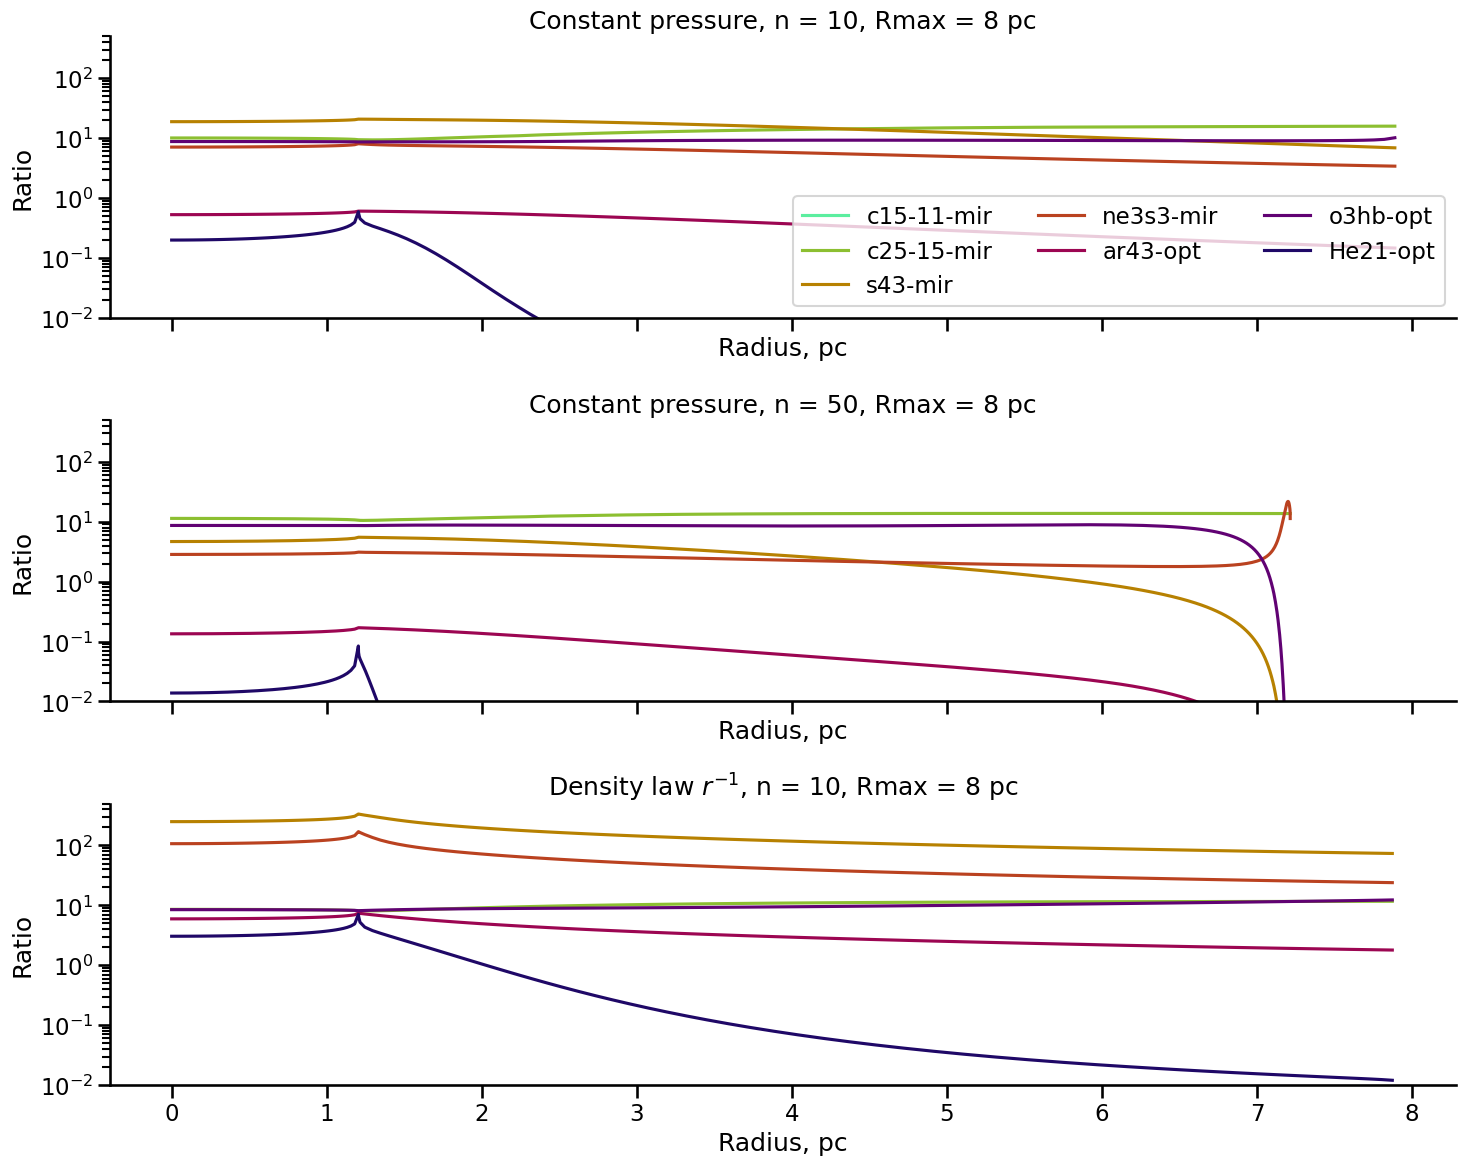

In [203]:
fig, axes = plt.subplots(3, 1, figsize=(15, 12), sharex=True)

# Take N colors from named colormap in [0.15, 0.85] range in HEX
colors = cmr.take_cmap_colors(
    'cmr.chroma_r', 
    len(ratio_dict), 
    cmap_range=(0.15, 0.85), 
    return_fmt='hex'
)

for m, ax in zip([m4, m7, m8], axes):
    radius = m.sbratios["b"] * u.cm.to(u.pc)
    rlabels = m.sbratios.colnames[1:]
    for rlabel, color in zip(rlabels, colors):
        ax.plot(radius, m.sbratios[rlabel], label=rlabel, color=color)
    ax.set(
        yscale="log",
        ylim=[0.01, 500],
        xlabel="Radius, pc",
        ylabel="Ratio",
    )
axes[0].legend(ncol=3)
axes[0].set_title("Constant pressure, n = 10, Rmax = 8 pc")
axes[1].set_title("Constant pressure, n = 50, Rmax = 8 pc")
axes[2].set_title("Density law $r^{-1}$, n = 10, Rmax = 8 pc")
sns.despine()
fig.tight_layout();

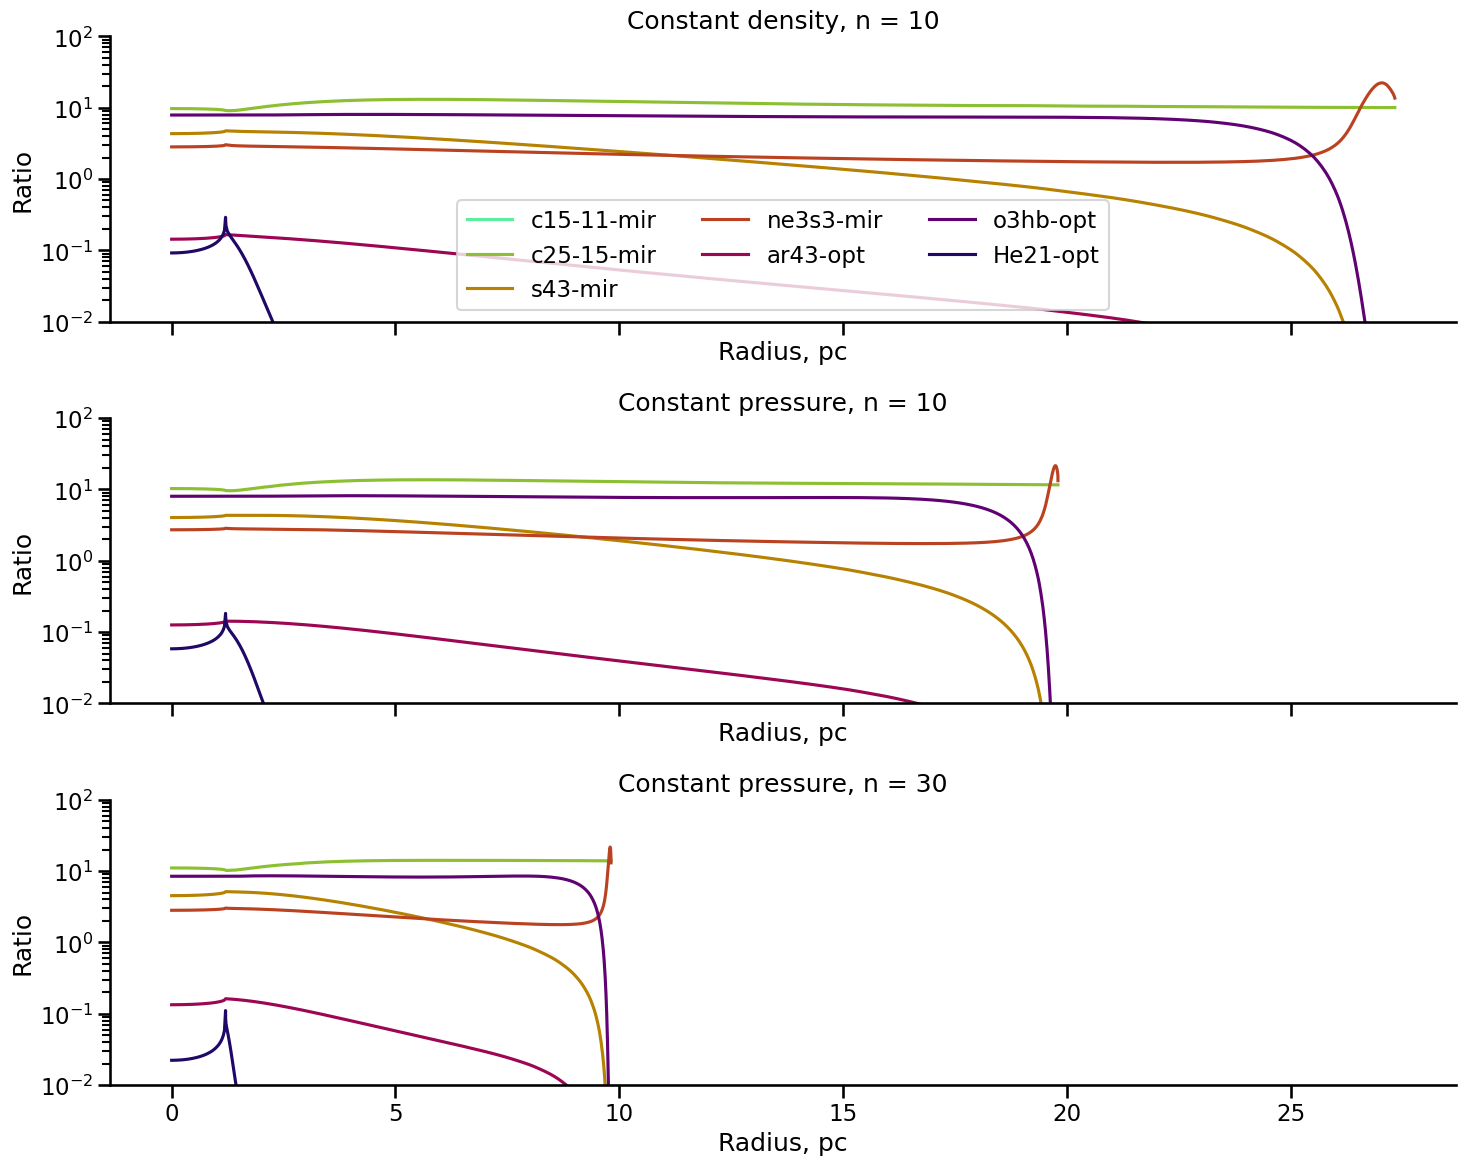

In [204]:
fig, axes = plt.subplots(3, 1, figsize=(15, 12), sharex=True)

# Take N colors from named colormap in [0.15, 0.85] range in HEX
colors = cmr.take_cmap_colors(
    'cmr.chroma_r', 
    len(ratio_dict), 
    cmap_range=(0.15, 0.85), 
    return_fmt='hex'
)

for m, ax in zip([m1, m2, m3], axes):
    radius = m.sbratios["b"] * u.cm.to(u.pc)
    rlabels = m.sbratios.colnames[1:]
    for rlabel, color in zip(rlabels, colors):
        ax.plot(radius, m.sbratios[rlabel], label=rlabel, color=color)
    ax.set(
        yscale="log",
        ylim=[0.01, 100],
        xlabel="Radius, pc",
        ylabel="Ratio",
    )
axes[0].legend(ncol=3)
axes[0].set_title("Constant density, n = 10")
axes[1].set_title("Constant pressure, n = 10")
axes[2].set_title("Constant pressure, n = 30")
sns.despine()
fig.tight_layout();

So these are looking pretty different from the observed ratios, with the exception of the 25/15 micron continuum ratio, which is around 10 in both the observations and the model. 